# Midterm Exam

## Instructions

- The midterm consists of **THREE** main questions. Please choose **TWO** out of the three main questions to work on.

- For each question, you need to accomplish one ultimate goal using the datasets from [`demo_data/midterm`](https://www.dropbox.com/scl/fo/bvbqmm07keanvx9vn4qz0/AFGZ151dXH2YBqk8TGidFto?rlkey=30y2xpt4sqg42lamaqdk8xx0u&dl=0). Each question is further divided into two sub-questions to help you accomplish the goal step by step.

- If you fail to produce the output from the previous question, and its output is the input for the subsequent question, you can use the sample output files provided in `demo_data/midterm` to start the sub-questions. For example, you can use the sample output of Question 1-1 for the task of Question 1-2.

- As with previous assignments, please submit both your **notebook** (`*.ipynb`) and the **HTML** output (`*.html`).

- Deadline for Midterm Submission: **12:10 (noon), Friday, April 19**, via Moodle.

:::{contents}
:::


:::{tip}
If you have any questions regarding the descriptions of the tasks, please send me an email message. I will response ASAP.
:::

------

## Question One (50%)

### Question 1-1

Please download the dataset from `demo_data/midterm/jay/`, which is a directory including lyric text files of songs by Jay Chou (周杰倫). Please load the entire corpus into a data frame, preprocess the raw lyrics, and save them in another column of the data frame. A sample data frame is provided below.

When preprocesssing the raw lyrics, please pay attention to the following issues:
   - Remove symbols and punctuations in the lyrics
   - Remove (English) alphabetic characters (including full-width alphabets, e.g. `ｔ`)
   - Remove digits (e.g., `01234`)

A complete output csv file is also available in `demo_data/midterm/question1-1-output-jay.csv`. You can compare your result with this sample csv.

------

##**Access Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Load packages**

In [2]:
import os
import re
import pandas as pd

##**Load the lyrics**

In [3]:
# Change directory to where lyrics are stored
directory = '/content/drive/My Drive/ENC2045_demo_data/jay/'

# List to store data
data = []

# Read each file and storing the details in the list
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            lyrics = file.read()
            # Append song name (removing file extension) and lyrics to the data list
            data.append({
                'title': filename[:-4],  # Assuming the title is the file name minus '.txt'
                'lyrics': lyrics
            })

# Create a DataFrame from the data list
jay = pd.DataFrame(data)
jay

,title,lyrics
0,我們在成長,我們在成長 從來不吵著要吃糖\n有話就去講 只會讓夢想更強壯\n我們在成長 從來不吵著要吃糖...
1,天涯過客,風起雁南下 景蕭蕭 落黃沙\n獨坐沏壺茶 沏成一夜 燈下\n你在 幾里外 的人家 想著他\n...
2,明明就,糖果罐裡好多顏色 微笑卻不甜了\n你的某些快樂 在沒有我的時刻\n中古世紀的城市裡 我想就走...
3,她的睫毛,(親愛的總有些事沒辦法教) 表錯情的感覺有一點糟\n賴著不走會讓人很感冒 以上這道理我全都了...
4,二手煙,(陳、唐)\n呀 呀 抽啊抽啊抽啊抽 呀\n我像隻鳥一樣快樂的飛翔\n手就不會無處可放...
...,...,...
207,說走就走,伸出手 搭便車 唱著歌 彈著斑鳩\n不遠處沙漠 我們才剛剛經過\n路兩旁是單調的顏色 卻有種...
208,鬥牛,三分球 它在空中停留 所有人看著我 拋物線進球\n單手過人運球 籃下妙傳出手 漂亮的假動作 ...
209,甜甜的,我輕輕的嚐一口 妳說的愛我\n還在回味妳給過的溫柔\n我輕輕的嚐一口 這香濃的誘惑\n我喜歡...
210,找自己,昨天晚上做了個夢 我走進撒哈拉沙漠 空無一人站在太陽下\n攝氏六十六點六度 快要焚化我的眼珠...


##**Preprocessing of lyrics**

In [4]:
def preprocess_text(text):
    # Remove punctuations and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Remove English alphabets (keep full-width)
    text = re.sub(r'[a-zA-Z]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    return text

# Apply the preprocessing function to the lyrics column
jay['lyrics_pre'] = jay['lyrics'].apply(preprocess_text)
jay.head()

,title,lyrics,lyrics_pre
0,我們在成長,我們在成長 從來不吵著要吃糖\n有話就去講 只會讓夢想更強壯\n我們在成長 從來不吵著要吃糖...,我們在成長 從來不吵著要吃糖\n有話就去講 只會讓夢想更強壯\n我們在成長 從來不吵著要吃糖...
1,天涯過客,風起雁南下 景蕭蕭 落黃沙\n獨坐沏壺茶 沏成一夜 燈下\n你在 幾里外 的人家 想著他\n...,風起雁南下 景蕭蕭 落黃沙\n獨坐沏壺茶 沏成一夜 燈下\n你在 幾里外 的人家 想著他\n...
2,明明就,糖果罐裡好多顏色 微笑卻不甜了\n你的某些快樂 在沒有我的時刻\n中古世紀的城市裡 我想就走...,糖果罐裡好多顏色 微笑卻不甜了\n你的某些快樂 在沒有我的時刻\n中古世紀的城市裡 我想就走...
3,她的睫毛,(親愛的總有些事沒辦法教) 表錯情的感覺有一點糟\n賴著不走會讓人很感冒 以上這道理我全都了...,親愛的總有些事沒辦法教 表錯情的感覺有一點糟\n賴著不走會讓人很感冒 以上這道理我全都了\n...
4,二手煙,(陳、唐)\n呀 呀 抽啊抽啊抽啊抽 呀\n我像隻鳥一樣快樂的飛翔\n手就不會無處可放...,陳唐\n呀 呀 抽啊抽啊抽啊抽 呀\n我像隻鳥一樣快樂的飛翔\n手就不會無處可放 腿...


##**Check the preprocessed results**

- When removing symbols, please make sure that the characters before and after the symbol are still properly separated (as shown below):

In [5]:
# Define the song title
song_title = '斷了的弦'

# Find the song in the DataFrame
song_data = jay[jay['title'] == song_title]

# Check if the song exists in the DataFrame
if not song_data.empty:
    print("Song Title:", song_title)
    print("[Raw Lyrics]:")
    print(song_data['lyrics'].values[0])  # .values[0] to get the string from the series
    print("="*50)
    print("[Preprocessed Version]:")
    print(song_data['lyrics_pre'].values[0])
else:
    print("Song not found in the DataFrame.")

Song Title: 斷了的弦
[Raw Lyrics]:
斷了的弦再怎麼練　我的感覺你已聽不見
你的轉變像斷掉的弦　再怎麼接音都不對　你的改變我能夠分辨
＊我沉默　你的話也不多　我們之間少了什麼　不說
哎唷～微笑後表情終於有點難過(握著你的手)　問你決定了再走
我突然釋懷的笑　笑聲盤旋半山腰
隨風在飄搖啊搖　來到你的面前繞
你淚水往下的掉　說會記住我的好　我也彎起了嘴角笑
你的美已經給了誰　追了又追我要不回
我瞭解離開樹的葉　屬於地上的世界凋謝
斷了的弦再彈一遍　我的世界你不在裏面
我的指尖已經彈出繭　還是無法留你在我身邊
△斷了的弦再怎麼練　我的感覺你已聽不見
你的轉變像斷掉的弦　再怎麼接音都不對　你的改變我能夠分辨
Repeat ＊～△
[Preprocessed Version]:
斷了的弦再怎麼練　我的感覺你已聽不見
你的轉變像斷掉的弦　再怎麼接音都不對　你的改變我能夠分辨
我沉默　你的話也不多　我們之間少了什麼　不說
哎唷微笑後表情終於有點難過握著你的手　問你決定了再走
我突然釋懷的笑　笑聲盤旋半山腰
隨風在飄搖啊搖　來到你的面前繞
你淚水往下的掉　說會記住我的好　我也彎起了嘴角笑
你的美已經給了誰　追了又追我要不回
我瞭解離開樹的葉　屬於地上的世界凋謝
斷了的弦再彈一遍　我的世界你不在裏面
我的指尖已經彈出繭　還是無法留你在我身邊
斷了的弦再怎麼練　我的感覺你已聽不見
你的轉變像斷掉的弦　再怎麼接音都不對　你的改變我能夠分辨
 


- Also, when removing the alphabets, make sure that the alphabets in full-width forms are removed as well, as shown below (e.g., `ｔｏｎｅ`):

In [6]:
# Define the song title
song_title = '你怎麼連話都說不清楚'

# Find the song in the DataFrame
song_data = jay[jay['title'] == song_title]

# Check if the song exists in the DataFrame
if not song_data.empty:
    print("Song Title:", song_title)
    print("[Raw Lyrics]:")
    print(song_data['lyrics'].values[0])  # .values[0] to get the string from the series
    print("="*50)
    print("[Preprocessed Version]:")
    print(song_data['lyrics_pre'].values[0])
else:
    print("Song not found in the DataFrame.")



# print("Song Title:", jay.title[200])
# print("[Raw Lyrics]:")
# print(jay.lyric[200])
# print("="*50)
# print("[Preprocessed Version]:")
# print(jay.lyric_pre[200])

Song Title: 你怎麼連話都說不清楚
[Raw Lyrics]:
這首歌沒有唱過．但是是我寫的．然後．寫給一個好朋友的歌
那．我自己重新來唱．我覺得應該．版本真的也不錯
想別的 可是在你眼中察覺什麼一閃而過
怎是像是寂寞 於是我會更沉默
沒說的 可是在你眼中察覺什麼一閃而過
而我看她笑著走開 於是我裝做不懂 怎麼能拆穿你的不同
偏偏 這地球 這麼擠 這麼小 這麼瘦 太陽刻意曬得那麼兇
記得離別在拆散一點以後
你怎麼連話都說不清楚 那溫柔的ｔｏｎｅ我聽得清楚
他站在我的身邊 你站在我的面前 怎麼這樣心裡會難過
你怎麼連話都說不清楚 那溫柔的痛我聽得清楚
你站在我的身邊 他經過我的面前 怎麼這樣心裡又難過 為什麼
想別的 可是我忽然察覺什麼一閃而過
於是像是寂寞 於是我會更沉默
沒說的 可是在你眼中察覺什麼一閃而過
於是像是寂寞 怎麼能拆穿不同 怎麼能拆穿你的不同
偏偏 這地球 這麼擠 這麼小 這麼瘦 太陽刻意曬得那麼兇
為什麼你出現在他出現以後
你怎麼連話都說不清楚 那溫柔的ｔｏｎｅ我聽得清楚
我站在他的身邊 你站在我的面前 怎麼這樣心裡會難過
你怎麼連話都說不清楚 那溫柔的痛我記得清楚
他站在我的面前 你經過我的身邊 忽然之間心裡又難過 為什麼
經由他處經過 為甚麼你卻又聽的清楚
你站在我的面前 他站在我的身邊 忽然之間心裡又難過
為什麼
感謝
DJGhost
修正歌詞
[Preprocessed Version]:
這首歌沒有唱過但是是我寫的然後寫給一個好朋友的歌
那我自己重新來唱我覺得應該版本真的也不錯
想別的 可是在你眼中察覺什麼一閃而過
怎是像是寂寞 於是我會更沉默
沒說的 可是在你眼中察覺什麼一閃而過
而我看她笑著走開 於是我裝做不懂 怎麼能拆穿你的不同
偏偏 這地球 這麼擠 這麼小 這麼瘦 太陽刻意曬得那麼兇
記得離別在拆散一點以後
你怎麼連話都說不清楚 那溫柔的ｔｏｎｅ我聽得清楚
他站在我的身邊 你站在我的面前 怎麼這樣心裡會難過
你怎麼連話都說不清楚 那溫柔的痛我聽得清楚
你站在我的身邊 他經過我的面前 怎麼這樣心裡又難過 為什麼
想別的 可是我忽然察覺什麼一閃而過
於是像是寂寞 於是我會更沉默
沒說的 可是在你眼中察覺什麼一閃而過
於是像是寂寞 怎麼能拆穿不同 怎麼能拆穿你的不同
偏偏 這地球 這麼擠 這麼小 這麼瘦 太陽刻意曬得那麼兇
為

### Question 1-2

Following the previous question, create a cluster analysis on all Jay's songs and find out the similarities in-between Jay's songs. Please pay attention to the following issues:

- Use `ckip-transformer` to word-seg the lyrics into word tokens.
- Please use TF-IDF weighted version of the bag-of-words representations for clustering.
- Please include in the bag-of-word vectorization:
    - (a) words whose minimum document frequency = 2;
    - (b) words which have at least two characters (i.e., removing all one-character word tokens);
    - (c) words whose parts-of-speech tags indicate they are either NOUNS or VERBS. However, for nouns, please EXCLUDE words that are pronouns （e.g., 你 我 她） or numerals (e.g., 一 二 三). Specifically, include words whose POS tags start with `N` or `V`, but exclude words tagged as `Nh` (i.e., pronouns) or `Neu` (i.e., numerals).

Your output should be a dendrogram as shown below. A complete `jpeg` file of the dendrogram is also available in `demo_data/midterm/question1-2-output-dendrogram.jpeg`.

------


##**Load packages**

In [7]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [8]:
!pip install -U ckip-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [9]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger

word_segmenter = CkipWordSegmenter(device=0)
pos_tagger = CkipPosTagger(device=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.86k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

##**Word segmentation & POS tagging**

In [10]:
# Extract lyrics to a list
lyrics_list = jay['lyrics_pre'].tolist()

# Perform word segmentation
segmented_lyrics = word_segmenter(lyrics_list)

# Perform POS tagging on segmented lyrics
pos_tags = pos_tagger(segmented_lyrics)

Inference: 100%|██████████| 2/2 [00:09<00:00,  4.58s/it]


In [11]:
def filter_lyrics(segmented, pos):
    filtered_corpus = []
    for seg_lyric, pos_lyric in zip(segmented, pos):
        filtered_tokens = []
        for word, tag in zip(seg_lyric, pos_lyric):
            if len(word) >= 2 and (tag.startswith('N') or tag.startswith('V')) and not tag.startswith('Nh') and not tag.startswith('Neu'):
                filtered_tokens.append(word)
        filtered_corpus.append(' '.join(filtered_tokens))
    return filtered_corpus

filtered_lyrics = filter_lyrics(segmented_lyrics, pos_tags)
filtered_lyrics[200]

'赤道 邊境 萬里無雲 事情 迴音 丘陵 崎嶇不平 入侵 專心 分辨 聲音 南極 結晶 用心 融化 決定 透明 堅硬 升空 對抗 重力 反應 渺小 風景 景景 景景 景色 分明 加速 引擎 拋開 遠方 黎明 速度 回應 銀河 逼近 流星 祈禱 專心 飛行 脫離 地心引力 熱情 命名 光年 傳遞 愛情 飛行 脫離 地心引力 熱情 宇宙 重力 環境 降臨'

##**Bag-of-words**

In [12]:
# Vectorize the filtered lyrics
cv = CountVectorizer(min_df=2)
cv_mat = cv.fit_transform(filtered_lyrics)
cv_mat

<212x2044 sparse matrix of type '<class 'numpy.int64'>'
	with 8740 stored elements in Compressed Sparse Row format>

In [13]:
cv_mat_array = cv_mat.toarray()
cv_mat_array

array([[0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# Get all unique words in the corpus which will serve as column headers
vocab = cv.get_feature_names_out()

# Extract titles to a list
titles = jay['title'].tolist()

# Create a DataFrame using the song titles from the 'jay' DataFrame as the index
jay_bow_df = pd.DataFrame(cv_mat_array, index=titles, columns=vocab)

# Display the DataFrame to ensure titles are only used as index labels, not as data in the first row
jay_bow_df.head(10)

,一下,一些,一切,一半,一幕幕,一樣,一次次,一生,一統,一行行,...,默契,默片,默背,點亮,點心,點頭,鼓勵,鼓掌,鼻子,龍捲風
我們在成長,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
天涯過客,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
明明就,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
她的睫毛,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
二手煙,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
無雙,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
竊愛,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
紅模仿,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
流浪詩人,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
天地一鬥,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**TF-IDF**

In [15]:
# For TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2)
tfidf_matrix = tfidf.fit_transform(filtered_lyrics)
vocab_tfidf = tfidf.get_feature_names_out()  # Get the vocabulary for column names

In [16]:
# Convert the TF-IDF matrix into a DataFrame
jay_tv_df = pd.DataFrame(tfidf_matrix.toarray(), index=titles, columns=vocab_tfidf)
jay_tv_df.head(10)

,一下,一些,一切,一半,一幕幕,一樣,一次次,一生,一統,一行行,...,默契,默片,默背,點亮,點心,點頭,鼓勵,鼓掌,鼻子,龍捲風
我們在成長,0.0,0.0,0.000000,0.0,0.0,0.047512,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.238708,0.0,0.0
天涯過客,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
明明就,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
她的睫毛,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.079944,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
二手煙,0.0,0.0,0.000000,0.0,0.0,0.075422,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
無雙,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.184479,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
竊愛,0.0,0.0,0.150109,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
紅模仿,0.0,0.0,0.000000,0.0,0.0,0.068336,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.099371,0.000000,0.0,0.0
流浪詩人,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
天地一鬥,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


- The Shape of the `CountVectorizer` Matrix After Filtering: ( `Number_of_Songs`,  `Number_of_Features`)

In [17]:
jay_bow_df.shape

(212, 2044)

- The Shape of the `TfidfVectorizer` Matrix After Filtering: ( `Number_of_Songs`,  `Number_of_Features`)

In [18]:
tfidf_matrix.shape

(212, 2044)

##**The pairwise similarity matrix of all songs**

In [19]:
similarity_doc = cosine_similarity(tfidf_matrix)

# Convert the cosine similarity matrix to a DataFrame
similarity_doc_df = pd.DataFrame(similarity_doc, index = titles, columns=titles)

In [20]:
similarity_doc_df.round(2)

,我們在成長,天涯過客,明明就,她的睫毛,二手煙,無雙,竊愛,紅模仿,流浪詩人,天地一鬥,...,公公偏頭痛,爺爺泡的茶,烏克麗麗,大笨鐘 + 暗號 + 彩虹 + 龍捲風,園遊會,說走就走,鬥牛,甜甜的,找自己,一點點
我們在成長,1.00,0.00,0.01,0.00,0.04,0.00,0.00,0.01,0.00,0.0,...,0.01,0.01,0.00,0.02,0.05,0.00,0.01,0.00,0.01,0.00
天涯過客,0.00,1.00,0.08,0.01,0.03,0.04,0.02,0.00,0.03,0.0,...,0.02,0.03,0.01,0.04,0.03,0.09,0.02,0.11,0.00,0.01
明明就,0.01,0.08,1.00,0.03,0.03,0.04,0.03,0.02,0.04,0.0,...,0.00,0.00,0.00,0.01,0.03,0.04,0.00,0.05,0.01,0.03
她的睫毛,0.00,0.01,0.03,1.00,0.01,0.02,0.02,0.01,0.01,0.0,...,0.02,0.04,0.00,0.02,0.09,0.02,0.00,0.04,0.01,0.02
二手煙,0.04,0.03,0.03,0.01,1.00,0.03,0.02,0.03,0.00,0.0,...,0.01,0.02,0.00,0.06,0.06,0.06,0.03,0.01,0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
說走就走,0.00,0.09,0.04,0.02,0.06,0.02,0.02,0.01,0.09,0.0,...,0.00,0.01,0.04,0.04,0.04,1.00,0.00,0.02,0.00,0.02
鬥牛,0.01,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.0,...,0.00,0.00,0.01,0.00,0.01,0.00,1.00,0.04,0.00,0.00
甜甜的,0.00,0.11,0.05,0.04,0.01,0.08,0.06,0.03,0.01,0.0,...,0.01,0.01,0.01,0.03,0.03,0.02,0.04,1.00,0.01,0.05
找自己,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.02,0.00,0.0,...,0.02,0.00,0.03,0.04,0.04,0.00,0.00,0.01,1.00,0.00


##**The dendrogram of songs**

In [21]:
# Download Chinese font `taipei_sans_tc_beta.ttf`

import matplotlib as mpl
from matplotlib.font_manager import fontManager

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-04-24 10:35:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.139, 142.251.2.100, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-24 10:35:11--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  40.3MB/s    in 0.5s    

2024-04-24 10:35:12 (

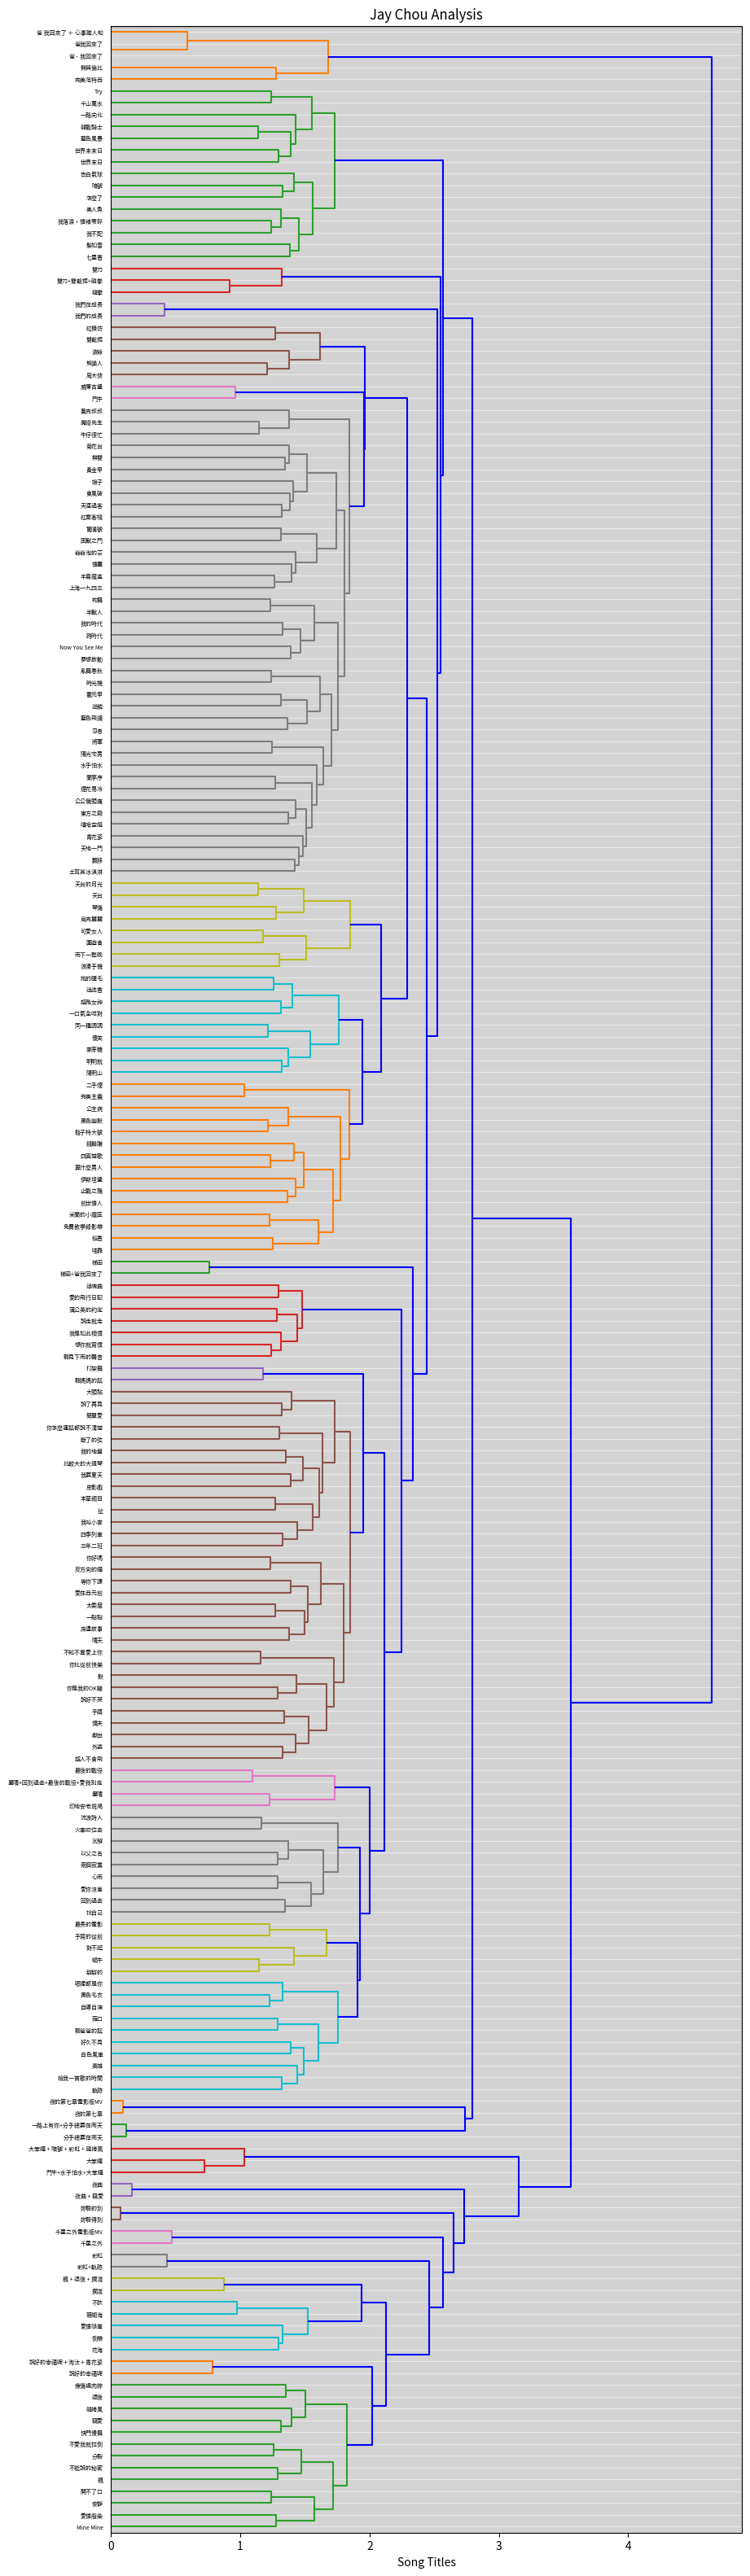

In [30]:
# Perform hierarchical clustering
Z = linkage(similarity_doc, method='ward')

# Plot settings
fig, ax = plt.subplots(figsize=(10, 40))  # Use subplots to get the axis
fig.patch.set_facecolor('white')  # Outer color
ax.set_facecolor('lightgrey')  # Inner background color

plt.title('Jay Chou Analysis')
plt.xlabel('Song Titles')

# Color threshold adjusted to highlight major clusters
color_threshold = 0.4 * np.max(Z[:, 2])  # Adjusting color threshold to be a percentage of maximum distance

# Dendrogram with color customizations
dendrogram(
    Z,
    labels=similarity_doc_df.index.tolist(),
    leaf_rotation=0,  # Labels should be horizontal for readability
    color_threshold=color_threshold,
    above_threshold_color='blue',  # Set the above threshold color to blue
    orientation='right', # Orient labels to the right
)

# Add grid lines with white color for better visibility
ax.yaxis.grid(True, linestyle='-', which='major', color='white', alpha=0.5)

# Draw a horizontal line at the color threshold
plt.axhline(y=color_threshold, color='k', linestyle='--', linewidth=0.2)

# Invert the y-axis if the root is to be at the top
plt.gca().invert_yaxis()

plt.show()

![](https://github.com/alvinntnu/NTNU_ENC2045_LECTURES/blob/main/exercise-ans/midterm/question1-2-output-dendrogram.jpeg?raw=1)

## Question Two (50%)

### Question 2-1

Use the datasets, `demo_data/midterm/chinese_name_gender_train.txt` (training set) and `demo_data/midterm/chinese_name_gender_test.txt` (testing set), to build a classifier to determine the gender of a Chinese name based on the bag-of-words model. The training set text file includes around 480,000 Chinese names and their gender labels (around 240,000 for each gender). All names have exactly three characters and they have been randomized.

The first step to the building of the classifier is text/name vectorization. Please create a NAME-by-FEATURE matrix using bag-of-words model. However, do not include all characters. Please include in the bag-of-words model only the following features:
   - Any Chinese characters that appear in the second position of the name (e.g., the `英` in 蔡英文)
   - Any Chinese characters that appear in the third position of the name (e.g., the `文` in 蔡英文)
   - Any Chinese character bigrams that appear in the second and the third characters of the name (i.e., the given name, e.g., `英文` in 蔡英文)

For all the above features, they will be included as classifying features only when they appear in at least **100 different names** (i.e., the minimum document frequency threshold).

The expected output of Question 2-1 is the bag-of-word representation of all the names in the training set following the above filtering guidelines. A sample has been provided below.

A complete sample output of the name-by-feature matrix for the training set is also available in `demo_data/midterm/question2-1-output-tv-matrix.csv`. (It is stored as a data frame with the Chinese names as the index and feature names as the columns.)

-----


- For training data, the shape of the NOUN-by-FEATURE matrix is as follows: ( `Number_of_Names_in_the_Training_Set`,  `Number_of_Features`)

In [23]:
X_train_bow.shape

NameError: name 'X_train_bow' is not defined

- A Sample of the NOUN-by-FEATURE matrix (Training Set):

In [ ]:
X_train_bow_df.head()

- In particular, bigrams that passed the minimum document frequency include (there are 287 bigrams):

In [ ]:
X_train_bow_df[[col for col in X_train_bow_df.columns if len(col)>1]].head()

- For testing data, the shape of the NOUN-by-FEATURE matrix is as follows : ( `Number_of_Names_in_the_Testing_Set`,  `Number_of_Features`)
- Please note that the feature number should be exactly the same as the number of the vectorized matrix of the training set.

In [ ]:
X_test_bow.shape

### Question 2-2

Following the previous question, please use the NAME-by-FEATURE matrix for classifier training (I used the Count-based version, i.e., `CountVectorizer()`). In order to find the best-performing classifier, please work on the following steps:

- Try two ML algorithms, `sklearn.naive_bayes.GaussianNB` and `sklearn.linear_model.LogisticRegression` and determine which algorithm performs better using *k*-fold cross validation (k = 10). Report the average accuracies of cross-validation for each ML method.
- After cross-validation, you would see that Logistic Regression performs a lot better. In Logistic Regression, there is one hyperparameter `C` and different initial values of C may yield different performances as well. Use Grid Search to fine-tune this parameter from these values: C = [1, 5, 10]. (You may refer to [sklearn's Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more detail on `C`.)
- After determining the ML algorithm and hyperparameter tuning, evaluate your final model with the testing set, i.e., `demo_data/midterm/chinese_name_gender_test.txt`. Report the confusion matrix plot of the results as shown below.
- Present LIME explanations of your model on the gender prediction of the following four names: `'王貴瑜','林育恩','張純映','陳英雲'`.
- Finally, perform a post-hoc analysis of the feature importances by looking at the top 10 features of the largest coefficient values for each gender prediction (see below).


------------------


- Cross Validation Results

In [ ]:
print("Mean Accuracy of Naive Bayes Model: ", model_gnb_acc.mean())
print("Mean Accuracy of Logistic Regression Model:", model_lg_acc.mean())

- Best Hyperparameter for Logistic Regression from Grid Search:

In [ ]:
clf.best_params_

- Confusion Matrix of the Final Model on Testing Set (Normalized):

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_bow, y_test, normalize='all')
#plot_confusion_matrix(clf, X_test_bow, y_test, normalize='all')
plt.title("Confusion Matrix (Normalized %)")

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_bow, y_test, normalize=None)
plt.title("Confusion Matrix (Frequencies)")

- LIME Explanations of Names:

In [ ]:
explanations[0].show_in_notebook(text=True)

In [ ]:
explanations[1].show_in_notebook(text=True)

In [ ]:
explanations[2].show_in_notebook(text=True)

In [ ]:
explanations[3].show_in_notebook(text=True)

- Feature Coefficients Analysis of Logistic Regression Model (Note: The number of coefficients should be the same as the number of features used in training.)

![](https://github.com/alvinntnu/NTNU_ENC2045_LECTURES/blob/main/exercise-ans/midterm/question2-2-output-featimportance.jpeg?raw=1)

## Question Three (50%)

### Question 3-1

This exercise requires the dataset, `demo_data/midterm/apple5000.csv`, which includes 5000 news articles from Apple Daily. Please use `spacy` and its pre-trained language model to extract word pairs of the dependency relation of `amod`. For example, in the following sequence:

```
"陸軍542旅下士洪仲丘關禁閉被操死，該旅副旅長何江忠昨遭軍高檢向最高軍事法院聲押獲准。何江忠的前同事說：「他（何江忠）只能用『陰險』兩字形容，得罪他都沒好下場。」還說他常用官威逼部下，「仗勢欺人、人神共憤，大家都不喜歡他。」被他帶過的阿兵哥說，懲處到了何手上都會加重，簡直是「大魔頭」。"
```

`spacy` identifies three token pairs showing a `amod` dependency relation, namely:

```
amod dep:  高 head: 軍事
amod dep:  前 head: 同事
amod dep:  大 head: 魔頭
```

Please note that the head and the dependent are NOT necessarily adjacent to each other. For example, in a sentence like:

```
"這是一個漂亮且美麗的作品，明亮的窗戶，房子很大。"
```

`spacy` identifies two token pairs showing a `amod` dependency relation, namely:

```
amod dep:  漂亮 head: 作品
amod dep:  明亮 head: 窗戶
```

With the `apple5000.csv` corpus, your job is to extract all word-pairs that show a `amod` dependency relation using `spacy` dependency parser. (These two word tokens may or may not be adjacent to each other.)

Please follow the following instructions for the analysis.

1. Preprocess each news article by removing symbols, punctuations, digits, and English alphabets (see the sample data frame below).
2. Parse all the articles using `spacy` and extract word pairs showing the `amod` dependency relation.
3. In `spacy`, you can choose to use either the more efficient language model `zh_core_web_sm` or the more accurate model `zh_core_web_trf`, depending on your hardware available. The sample results below are based on `zh_core_web_trf`.
4. In your final report, please include only word pairs where the nouns are of AT LEAST two syllables/characters. Your final report is a frequency list of these word pairs (see the sample data frame below for the top 50 frequent pairs).
5. A sample output csv is provided in `demo_data/midterm/question3-1-output-modnounfreq.csv`.
6. Please note that your results may vary due to the selection of the pretrained language models in spacy. This is OK.

---------


##**Install spacy**

In [31]:
!pip install spacy
!python -m spacy download zh_core_web_sm  # Smaller, more efficient model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##**Load packages**

In [32]:
import spacy
import pandas as pd
import itertools
from collections import Counter

##**Load the data of Apple Daily News**

In [33]:
apple_df = pd.read_csv('/content/drive/My Drive/ENC2045_demo_data/apple5000.csv')
apple_df.head()

,doc_id,text
0,1,【鄧玉瑩╱台中報導】台中市警二分局育才派出所爆發疑似集體索賄案，台中地檢署檢察官指揮調查局中...
1,2,陸軍542旅下士洪仲丘關禁閉被操死，該旅副旅長何江忠昨遭軍高檢向最高軍事法院聲押獲准。何江忠...
2,3,終於拿到冠軍，感覺真是棒，尤其是從蔣宸豑的手上搶過來，算是報了一箭之仇。其實我今天的推桿感覺...
3,4,【陳毓婷╱台北報導】過去業績不甚理想的中國人壽（2823），今年初找來南山人壽的專業經理人王...
4,5,台灣國際語文教育協會假借中央機關指導名義，招攬學員參加該機構舉辦的觀光研習營，活動宣稱「參加...


##**Preprocessing of the news text**

In [34]:
apple_df['text_pre'] = apple_df['text'].str.replace('[^\u4e00-\u9fff]', ' ', regex=True)
apple_df.head()

,doc_id,text,text_pre
0,1,【鄧玉瑩╱台中報導】台中市警二分局育才派出所爆發疑似集體索賄案，台中地檢署檢察官指揮調查局中...,鄧玉瑩 台中報導 台中市警二分局育才派出所爆發疑似集體索賄案 台中地檢署檢察官指揮調查局中...
1,2,陸軍542旅下士洪仲丘關禁閉被操死，該旅副旅長何江忠昨遭軍高檢向最高軍事法院聲押獲准。何江忠...,陸軍 旅下士洪仲丘關禁閉被操死 該旅副旅長何江忠昨遭軍高檢向最高軍事法院聲押獲准 何江忠...
2,3,終於拿到冠軍，感覺真是棒，尤其是從蔣宸豑的手上搶過來，算是報了一箭之仇。其實我今天的推桿感覺...,終於拿到冠軍 感覺真是棒 尤其是從蔣宸豑的手上搶過來 算是報了一箭之仇 其實我今天的推桿感覺...
3,4,【陳毓婷╱台北報導】過去業績不甚理想的中國人壽（2823），今年初找來南山人壽的專業經理人王...,陳毓婷 台北報導 過去業績不甚理想的中國人壽 今年初找來南山人壽的專業經理人王...
4,5,台灣國際語文教育協會假借中央機關指導名義，招攬學員參加該機構舉辦的觀光研習營，活動宣稱「參加...,台灣國際語文教育協會假借中央機關指導名義 招攬學員參加該機構舉辦的觀光研習營 活動宣稱 參加...


##**Extract word pairs with the `amod` relation**

In [35]:
nlp = spacy.load('zh_core_web_sm')  # or 'zh_core_web_trf'

In [36]:
def extract_filtered_amod_pairs(doc):
    amod_pairs = []
    for token in doc:
        if token.dep_ == 'amod' and token.head.pos_ == 'NOUN' and len(token.head.text) >= 2:
            amod_pairs.append(f"{token.text}_{token.head.text}")
    return amod_pairs

- Examples of Raw Texts and Preprocessed Texts

In [37]:
apple_df['amod_pairs'] = apple_df['text_pre'].apply(lambda x: extract_filtered_amod_pairs(nlp(x)))
apple_df.head()

,doc_id,text,text_pre,amod_pairs
0,1,【鄧玉瑩╱台中報導】台中市警二分局育才派出所爆發疑似集體索賄案，台中地檢署檢察官指揮調查局中...,鄧玉瑩 台中報導 台中市警二分局育才派出所爆發疑似集體索賄案 台中地檢署檢察官指揮調查局中...,"[才_派出所, 獲准_派出所, 帶回_警員, 偵訊_檢調, 潘明祥_會計, 坦_承行, 不等..."
1,2,陸軍542旅下士洪仲丘關禁閉被操死，該旅副旅長何江忠昨遭軍高檢向最高軍事法院聲押獲准。何江忠...,陸軍 旅下士洪仲丘關禁閉被操死 該旅副旅長何江忠昨遭軍高檢向最高軍事法院聲押獲准 何江忠...,"[高_法院, 前_同事, 常用_逼部, 大_魔頭, 假_成績, 苛刻_作風, 找該_副連長,..."
2,3,終於拿到冠軍，感覺真是棒，尤其是從蔣宸豑的手上搶過來，算是報了一箭之仇。其實我今天的推桿感覺...,終於拿到冠軍 感覺真是棒 尤其是從蔣宸豑的手上搶過來 算是報了一箭之仇 其實我今天的推桿感覺...,[前_兩次]
3,4,【陳毓婷╱台北報導】過去業績不甚理想的中國人壽（2823），今年初找來南山人壽的專業經理人王...,陳毓婷 台北報導 過去業績不甚理想的中國人壽 今年初找來南山人壽的專業經理人王...,"[報導_過去, 達_億元, 與國_內壽, 通常_公司, 新_契約, 高_中壽, 新_契約, ..."
4,5,台灣國際語文教育協會假借中央機關指導名義，招攬學員參加該機構舉辦的觀光研習營，活動宣稱「參加...,台灣國際語文教育協會假借中央機關指導名義 招攬學員參加該機構舉辦的觀光研習營 活動宣稱 參加...,"[甄選_網路, 將請_外交部, 梯次_活動, 時間_收費, 錄_觀光局, 稱_觀光局, 試辦..."


##**Output a dataframe**

In [38]:
# Flatten the list of lists into a single list of pairs
all_pairs = list(itertools.chain(*apple_df['amod_pairs']))

# Calculate frequencies
pair_freq = Counter(all_pairs)

In [39]:
mod_head_df = pd.DataFrame(list(pair_freq.items()), columns=['MOD-NOUN', 'Frequency'])
mod_head_df = mod_head_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

##**Check the number of MOD-NOUN types**

In [40]:
len(mod_head_df)

38986

##**Top 50 frequent MOD-NOUN showing `amod` dependency relation in Apple News**

In [41]:
mod_head_df.sort_values(['Frequency'],ascending=[False]).head(50)

,MOD-NOUN,Frequency
0,新_台幣,104
1,女_主角,82
2,大_股東,41
3,報導_台灣,40
4,好_朋友,39
5,男_主角,39
6,來源_外電,38
7,最高_法院,36
8,新_專輯,33
9,馬來_西亞,31


### Question 3-2

Following the previous question, with the extracted MODIFIER-NOUN word pairs, please create a NOUN-by-MODIFIER co-occurrence table, showing the co-occurring frequencies of a particular noun (i.e., the row) and a particular modifier (i.e., the column) (see the sample data frame below).

In addition, with a co-occurrence matrix like this, we can cluster the NOUNS according their co-occurring patterns with different modifiers. That is, please perform a cluster analysis on the NOUNS, using their co-occurring frequencies with the MODIFIERS as the features. In particular, among all these modifier-noun pairs:
   - please include nouns whose total frequencies are > 70 (i.e., given the NOUN-by-MODIFIER matrix, you need to include only rows whose row sums are > 70)
   - please include modifiers whose total frequencies are > 10 (i.e., given the NOUN-by-MODIFIER matrix, you need to include only columns whose column sums are > 10)
   - perform the cluster analysis using the default settings used in the lecture notes (i.e., cosine similarity, linkage of ward's method).
   
   
:::{important}

In case you fail to create the output from Question 3-1, you can use the sample output csv, `demo_data/midterm/question3-1-output-modnounfreq.csv`, as your starting point for this exercise.

The csv file is the expected output from Question 3-1, including all the MODIFIER-NOUN pairs identified by `spacy` and their frequency counts in the corpus. (As specified in Question 3-1, bigrams with one-syllable nouns have been removed from the list.)

:::


-------

##**Load packages**

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram

##**Separate nouns and modifiers**

In [43]:
# Split the 'MOD_NOUN' pairs into 'modifier' and 'noun'
apple_df['modifier'], apple_df['noun'] = zip(*apple_df['amod_pairs'].apply(lambda pairs: zip(*[p.split('_') for p in pairs]) if pairs else ((), ())))
apple_df = apple_df.explode(['modifier', 'noun'])

##**Create co-occurrence table**

In [44]:
noun_by_mod = pd.crosstab(apple_df['noun'], apple_df['modifier'])

In [45]:
print(noun_by_mod.shape)

(17119, 10689)


In [46]:
# Filter rows where total frequencies are > 70
noun_by_mod = noun_by_mod[noun_by_mod.sum(axis=1) > 70]

# Filter columns where total frequencies are > 10
noun_by_mod_filtered_df = noun_by_mod.loc[:, noun_by_mod.sum(axis=0) > 10]
noun_by_mod_filtered_df

modifier,一般,不同,中小,主要,低,來源,前,區,名,國際,...,與,萬元,處理,酷,醫學,重要,馬,高,高等,黨
noun,,,,,,,,,,,,,,,,,,,,,
中心,0,0,0,0,0,2,0,4,0,13,...,0,0,1,0,12,0,0,0,1,0
主角,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
人士,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,2,0,0,1,0,0
企業,0,0,14,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
公司,2,0,0,1,1,3,5,1,0,7,...,1,1,2,0,0,2,0,3,0,0
台幣,0,0,0,0,0,0,1,0,0,0,...,0,23,0,0,0,0,0,1,0,0
台灣,0,1,0,0,0,8,3,1,2,0,...,2,1,0,0,0,0,1,4,0,0
品牌,0,1,0,1,0,0,2,1,0,4,...,2,0,0,0,1,0,0,2,0,0
商品,2,0,0,2,3,0,6,1,0,0,...,0,1,0,0,0,0,0,2,0,0


In [47]:
noun_by_mod_filtered_df.shape

(32, 43)

##**Pairwise cosine similarity matrix for nouns whose frequency > 70**

In [48]:
# Normalize the matrix and compute cosine similarity
normed_matrix = noun_by_mod_filtered_df.div(np.sqrt((noun_by_mod_filtered_df**2).sum(axis=1)), axis=0)
cosine_sim = cosine_similarity(normed_matrix.fillna(0))

In [49]:
# Download Chinese font `taipei_sans_tc_beta.ttf`

import matplotlib as mpl
from matplotlib.font_manager import fontManager

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-04-24 10:50:48--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.102, 142.251.2.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-24 10:50:48--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   107MB/s    in 0.2s    

2024-04-24 10:50:52 (

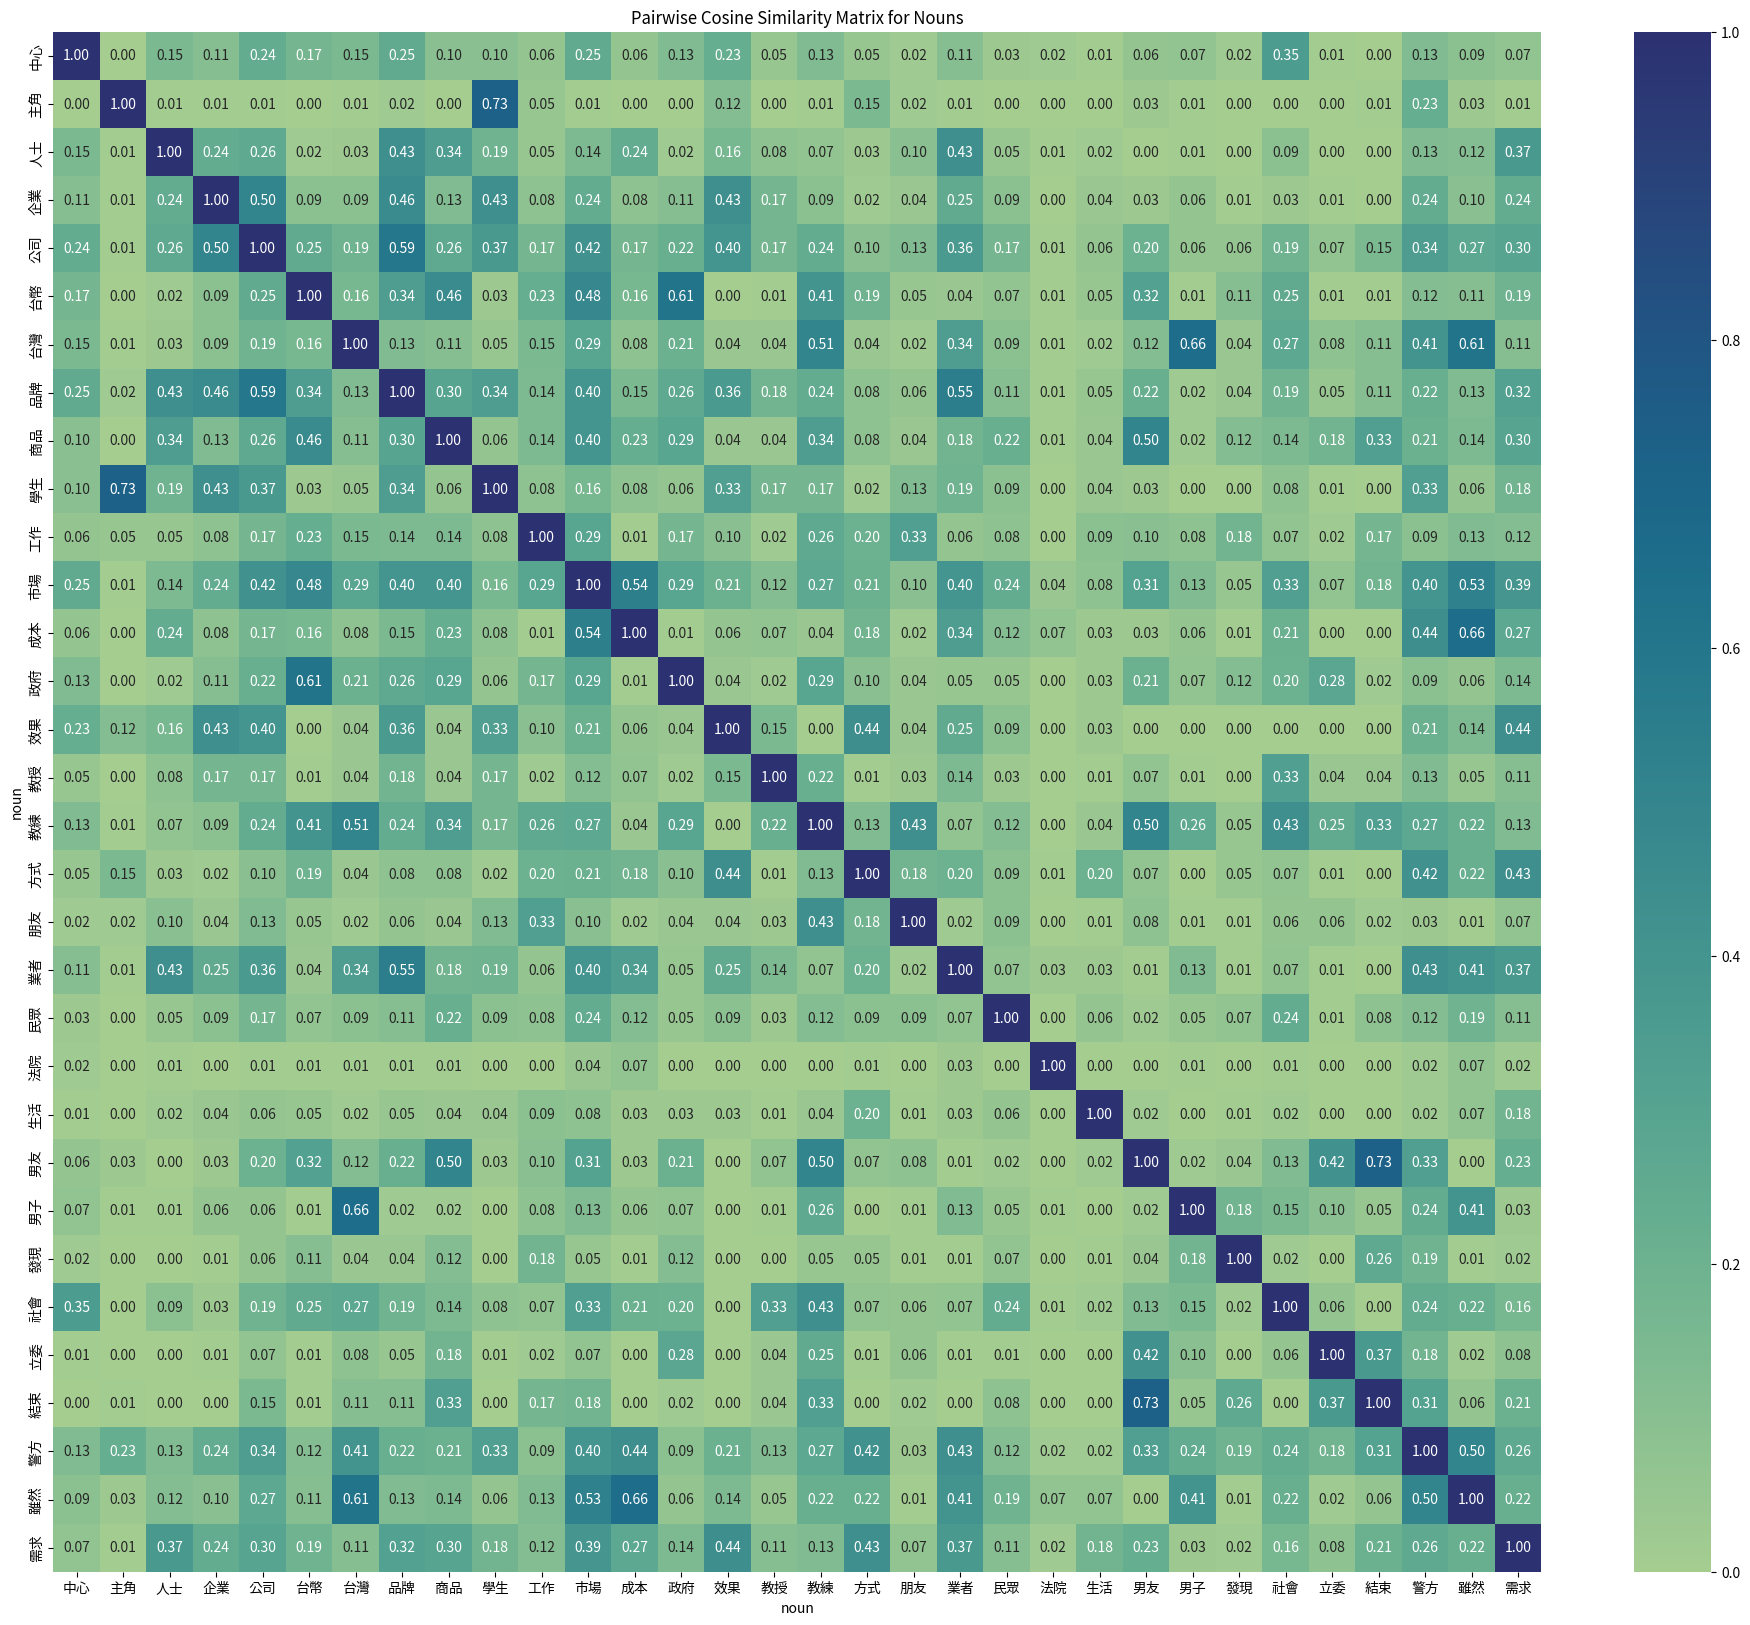

In [50]:
# Convert the cosine similarity matrix into a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim, index=noun_by_mod_filtered_df.index, columns=noun_by_mod_filtered_df.index)

# Round the values in the DataFrame to two decimal places
cosine_sim_df = cosine_sim_df.round(2)

# Display the cosine similarity matrix using seaborn
plt.figure(figsize=(24, 20))
sns.heatmap(cosine_sim_df, annot=True, fmt=".2f", cmap="crest")
plt.title('Pairwise Cosine Similarity Matrix for Nouns')
plt.show()

![](https://github.com/alvinntnu/NTNU_ENC2045_LECTURES/blob/main/exercise-ans/midterm/question3-2-output-heatmap.jpeg?raw=1)

##**Visualize the cluster dengrogram**

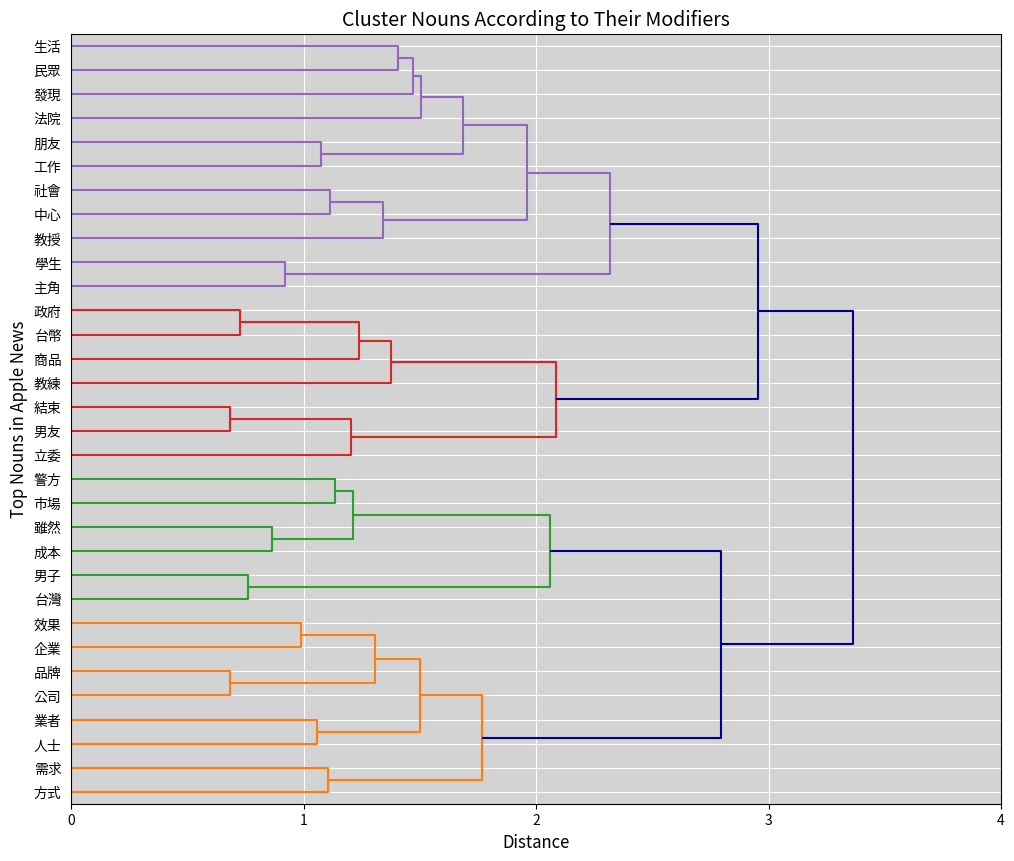

In [53]:
linkage_matrix = linkage(cosine_sim, method='ward')

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor('lightgrey')  # Set the background color for the plot area

# Plot the dendrogram with the specified orientation and colors
dendrogram(
    linkage_matrix,
    labels=noun_by_mod_filtered_df.index.tolist(),
    orientation='right',  # Right-oriented dendrogram
    leaf_rotation=0,      # No rotation of the noun names
    leaf_font_size=10,    # Font size for leaf labels
    color_threshold=0.7 * max(linkage_matrix[:, 2]),  # Color threshold for clusters
    above_threshold_color='darkblue'
)

# Add title and axis labels
plt.title('Cluster Nouns According to Their Modifiers', fontsize=14, color='black')
plt.xlabel('Distance', fontsize=12, color='black')
plt.ylabel('Top Nouns in Apple News', fontsize=12, color='black')

# Configure grid lines within the dendrogram
ax.grid(True, linestyle='-', color='white')  # Enable grid lines with white color

# Set x-axis limits and ticks to range from 0 to 4
ax.set_xlim(0, 4)
plt.xticks(range(0, 5))  # Setting x-ticks from 0 to 4

# Display the plot
plt.show()